Implementation of the fictitious play dynamic in the following repeated game. 
 - In each round, a cake arrives (which is identical to the one in the previous round). Alice cuts the cake at some point of her choice and Bob 
 simultaneously declares Left/Right to indicate what piece he wants; Alice will take the piece Bob did not choose. 
 - In fictitious play, each player best responds to the distribution of actions of the other player 

Generating random valuations for the two players

The densities are::
- Alice:: [0.0, 0.007190046289818931, 0.06338456816337724, 0.0002535520116546044, 0.009699135109880637, 0.054819945670749416, 0.059413306665334564, 0.056627772422160494, 0.028215235997790532, 0.06208195279738102, 0.06100655773412691, 0.040841494369404735, 0.05538118430824543, 0.0040041611975470594, 0.0175659437443843, 0.046892763893572456, 0.014038682029649103, 0.06361333348844954, 0.036115328375012135, 0.012620039576978109, 0.039168620480161176, 0.05473715299004408, 0.03508905740938

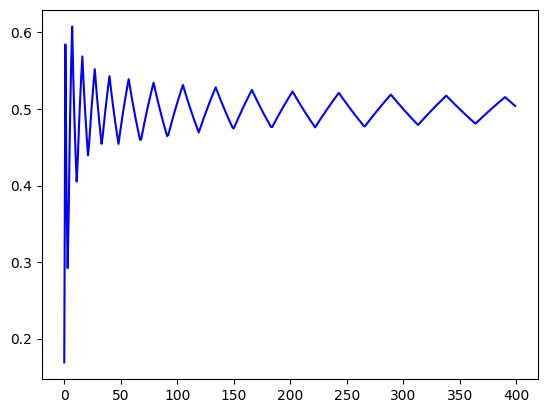

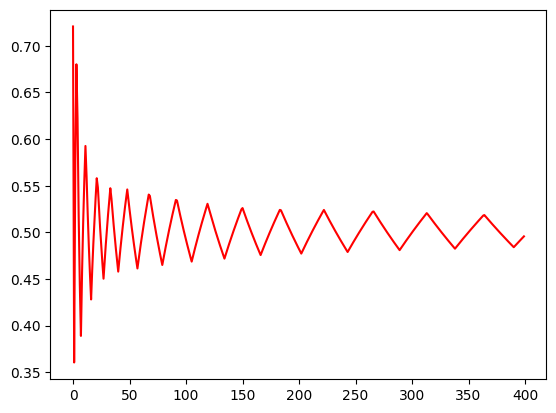

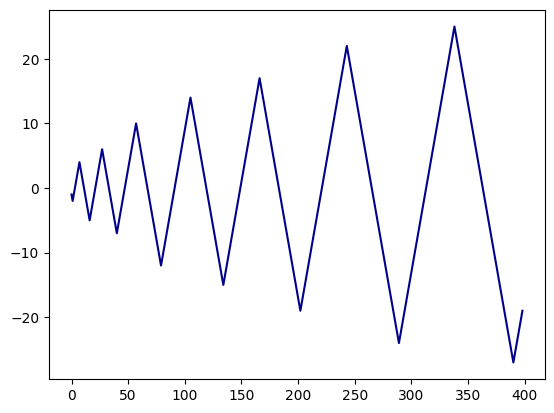

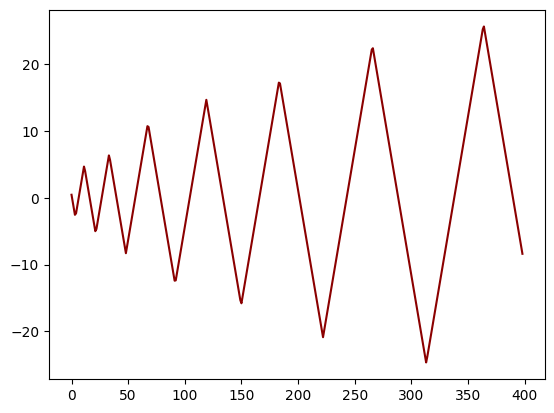

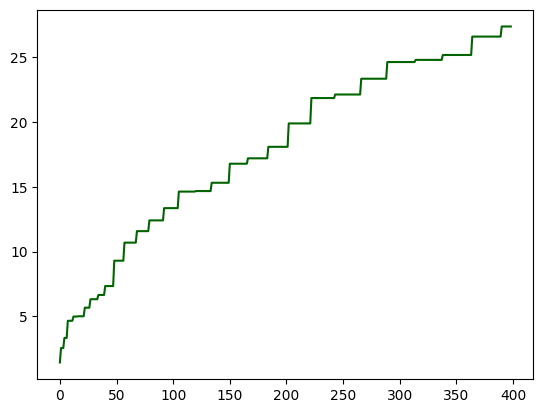

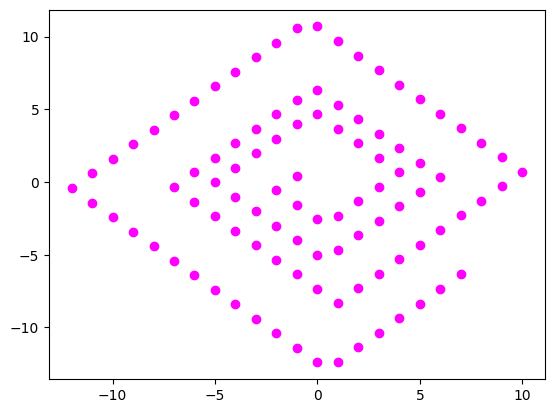

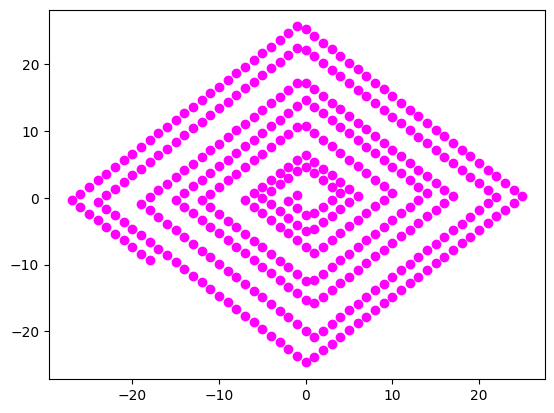

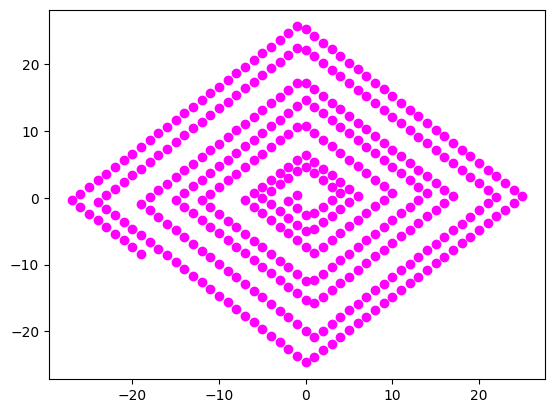

Arrived at the end


In [2]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
#import pylab

Alice = 0
Bob = 1

T = 400 # time horizon

m = 30 # number of atoms arranged in a line

Left = 0
Right = 1

delta = 0.001
epsilon = delta / 10 # this will be used when measuring best responses

def generate_piecewise_constant_densities():
    d = [[0.0 for e in range(m+1)] for e in range(2)] # d[i][j] is the value (density) of player i for atom j; we ignore atom 0

    max_H = 1000 # maximum height
    min_H = 1 # minimum height

    # make it uniform for Alice
    sum_Alice = sum_Bob = 0

    for i in range(1, m+1):
        d[Alice][i] = np.random.uniform(min_H, max_H)
        sum_Alice += d[Alice][i]

        d[Bob][i] = np.random.uniform(min_H, max_H)
        sum_Bob += d[Bob][i]

    #print("The non-normalized densities are::")
    #print("Alice::", d[Alice])
    #print("Bob::", d[Bob])

    for i in range(1, m+1):
        d[Alice][i] = d[Alice][i] / sum_Alice
        d[Bob][i] = d[Bob][i] / sum_Bob

    # Now normalizing the densities

    print("The densities are::")
    print("- Alice::", d[Alice])
    print("- Bob::", d[Bob])
    return d

# this computes the valuations induced by the densities,
# specifically precomputing the value for the first j atoms for each player and for each j
def compute_valuations(d):
    v = [[0.0 for e in range(m+1)] for e in range(2)] # v[i][j] is the value of player i for atoms 1,...,j; ; we ignore atom 0

    #print("Entering compute_valuations")
    for i in range(2):
        v[i][1] = d[i][1] # the value for the first atom is equal to its density
        for j in range(2,m+1):
            v[i][j] = v[i][j-1] + d[i][j]
    #print("Exiting compute_valuations")
    return v

# compute list of best responses for Bob given there have been t cuts by Alice so far
def Bob_best_response(v, cut_history, t):
    #print("Entering computing best response for Bob")
    # estimate which of left, right (potentially both) are best responses to Alice's history of cuts
    expected_utility_left = expected_utility_right = 0

    # first compute Bob's expected utility when he plays Left and Alice plays according to the distribution given by the cut history
    for j in range(m+1):
        expected_utility_left += cut_history[j]/t * v[Bob][j] # add probability of playing j (given by frequency) * value for first j units to expected_utility_left
        expected_utility_right += cut_history[j]/t * (1 - v[Bob][j]) # add probability of playing j (given by frequency) * value for everything minus the first j units to expected_utility_right

    #print("The history of cuts is::", cut_history)
    #print("Bob's expected utility when responding to the historical frequency by playing left is::", expected_utility_left)

    #print("Bob's expected utility when responding to the historical frequency by playing right is::", expected_utility_right)

    if expected_utility_left > expected_utility_right:
        return Left
    elif expected_utility_right > expected_utility_left:
        return Right

    #May want to allow a small error when comparing them: if abs(expected_utility_left - expected_utility_right) < epsilon:
    # if equal, return one of them, prob 1/2 each

    return random.randint(0, 1) # returns a number in {0,1}, where Left = 0 and Right = 1

def Alice_best_response(v, choice_history, t):
    #print("Entering computing best response for Alice")
    expected_utility_Alice = [0 for e in range(m+1)] # Alice has the option to cut at 0/m, 1/m, ..., m/m, keeping expected utility for each

    for j in range(m+1): # compute expected utility for Alice if she cuts at point j and Bob's strategy is randomized as given by the frequency of the history in cut_history
        expected_utility_Alice[j] =  choice_history[Left] / t * (1 - v[Alice][j]) + choice_history[Right]/t * v[Alice][j]

#    TODO: Find all the maxima in expected_utility_Alice vector and pick one uniformly at random
    max_Alice = -1
    for j in range(m+1):
        if expected_utility_Alice[j] > max_Alice:
            max_Alice = expected_utility_Alice[j]

     # Now go a second time and record all the best responses
    all_max_Alice = []
    for j in range(m+1):
        if expected_utility_Alice[j] == max_Alice:
            all_max_Alice.append(j)

    #print("The list of best responses of Alice to the history is::", all_max_Alice)

    k = random.randint(0,len(all_max_Alice)-1) # generate a random index -> will return the best response at this index

    #print("The history of choices is::", choice_history)
    #print("Alice chooses best response which is to cut at ", all_max_Alice[k])
    return all_max_Alice[k]

def main():

    print("Implementation of the fictitious play dynamic in the following repeated game. \n - In each round, a cake arrives (which is identical to the one in the previous round). Alice cuts the cake at some point of her choice and Bob \n simultaneously declares Left/Right to indicate what piece he wants; Alice will take the piece Bob did not choose. \n - In fictitious play, each player best responds to the distribution of actions of the other player \n")

    cut_history = [0 for e in range(m+1)] # cut_history[j] = number of times that the cut was such that j atoms were to the left and the remainder to the right

    choice_history = [0 for e in range(2)] # choice_history[Left] = number of times Left  was chosen; similarly for Right;

    print("Generating random valuations for the two players\n")

    d = generate_piecewise_constant_densities()

    v = compute_valuations(d)

    #print("Printing the valuations for the first j atoms:\n")
    #print("Alice::\n")
    #for j in range(1,m+1):
    #    print("Value of Alice for the first ", j, " atoms::",v[Alice][j])

    #print("Bob::\n")
    #for j in range(1,m+1):
    #    print("Value of Bob for the first ",j,"atoms::",v[Bob][j])

    util = [[0.0 for e in range(T+1)] for e in range(2)]  # history of utilities

    right_choices = [0.0 for e in range(T+1)] # r[t] = number of times that Bob picked R in the first t rounds
    left_choices = [0.0 for e in range(T+1)] # ell[t] = number of times that Bob picked L in the first t rounds
    alpha = [0.0 for e in range(T+1)] # alpha[t] = r[t] - ell[t]
    beta = [0.0 for e in range(T+1)] # beta[t] = \sum_{i = 1}^t (2 * V_B([0,a_i]) - 1)
    rho = [0.0 for e in range(T+1)] # rho[t] = |alpha[t]| + |beta[t]|

    cumulative_util = [0 for e in range(2)] # keep the total utility for each player here to compute the average
    cumulative_util_avg = [[0.0 for e in range(T+1)] for e in range(2)] # keep the total utility for each player here to compute the average

    sum_of_util = [1 for e in range(T+1)] # history of sum of utilities (or some other aggregate measure)

    for t in range(1,T+1): # time/rounds indexed from 1 to T
        #print("Time ", t)
        cut = Alice_best_response(v, choice_history, t)
        #print("Alice cut at", cut)

        choice = Bob_best_response(v, cut_history, t)

        cut_history[cut] += 1 # increase the count for this cut point
        ### IMPORTANT: Keep cut_history above choice assignment if we want to let Bob best respond to the whole history

        choice_history[choice] += 1 # increase the count for this choice of Bob
        #print("Bob chose ", choice)

        if choice == Right:

            #print("Entering branch where Bob chose right; recall the cut was:", cut,"; Alice's utility should be ", v[Alice][cut])
            util[Alice][t] = v[Alice][cut]
            util[Bob][t] = 1 - v[Bob][cut]
            right_choices[t] = right_choices[t-1] + 1
            left_choices[t] = left_choices[t-1]

        else: # the choice is Left

            #print("Entering branch where Bob chose left;")
            util[Alice][t] = 1 - v[Alice][cut]
            util[Bob][t] = v[Bob][cut]
            left_choices[t] = left_choices[t-1] + 1
            right_choices[t] = right_choices[t-1]

        alpha[t] = right_choices[t] - left_choices[t] # Either way, compute alpha[t]
        beta[t] = beta[t-1] + (2 * v[Bob][cut] - 1)
        rho[t] = abs(alpha[t]) + abs(beta[t])

        cumulative_util[Alice] += util[Alice][t]
        cumulative_util_avg[Alice][t] = cumulative_util[Alice]/t

        cumulative_util[Bob] += util[Bob][t]
        cumulative_util_avg[Bob][t] = cumulative_util[Bob]/t

        sum_of_util[t] = util[Alice][t] + util[Bob][t]

    print("\nFinished simulating fictitious play over a period of ", T, "rounds, some information about the results of the simulation now::\n")

    #print("Alice's utility over time is::", util[Alice],"\n")
    #print("Bob's utility over time is::", util[Bob],"\n")

    print("Bob chose Right a fraction of ", right_choices[T]/T, "times\n")
    print("Alice's average utility is::", cumulative_util[Alice]/T, "\n")
    print("Bob's average utility is::", cumulative_util[Bob]/T, "\n")

    print("Displaying the players' cumulative utilities next, together with some other relevant quantities\n")

    #print("The right count over time:", right_choices)
    #print("The left count over time:", left_choices)

    #print("The different right-left over time is:", alpha,"\n\n")

    plt.figure(1)
    plt.plot(cumulative_util_avg[Alice][1:], color='blue')

    plt.figure(2)
    plt.plot(cumulative_util_avg[Bob][1:], color='red')
    #plt.show()

    #print("Now normalizing the sum of utilities::")
    for t in range(1,T):
        sum_of_util[t] = sum_of_util[t] / t

    plt.figure(3)
    plt.plot(alpha[1:T], color='darkblue')

    plt.figure(4)
    plt.plot(beta[1:T], color='darkred')

    plt.figure(5)
    plt.plot(rho[1:T], color='darkgreen')

    plt.figure(6)
    plt.scatter(alpha[1:100], beta[1:100], color='magenta')

    plt.figure(7)
    plt.scatter(alpha[1:1000], beta[1:1000], color='magenta')

    plt.figure(8)
    plt.scatter(alpha[1:T], beta[1:T], color='magenta')

    plt.show()

    print("Arrived at the end")
main()